<a href="https://colab.research.google.com/github/farhanrhine/deep-learning/blob/main/ANN_practical_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEEP LEARNING

- In Today Video :
1. Practical Implementation of ANN Models using Regular Method
2. Callbacks
3. ANN Model using Functional API


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 119.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.1 MB/s eta 0:00:00


### SIMPLE ANN NEURAL NETWORK using regular method

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # All layers  import
import matplotlib.pyplot as plt

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=columns, na_values='?')
data.dropna(inplace=True)

In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [13]:
data.shape

(297, 14)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [15]:
data["target"].value_counts()

,count
target,
0,160
1,54
2,35
3,35
4,13





```
1. keras.utils is a module inside Keras that contains various utility functions to help with data preprocessing, model building, etc.
```


```
2. to_categorical is a specific utility function used to convert class labels (like 0, 1, 2, ...) into a one-hot encoded format.(This makes it easier for models to interpret categories as vectors instead of raw integers.)
```



```
# 3. What about data["target"].values?
```

> Here, data is probably a pandas DataFrame.

> "target" is the column that holds the class labels.

> .values converts that pandas Series into a NumPy array, which is what to_categorical expects as input.



In [16]:
X = data.drop("target", axis=1)
Y = keras.utils.to_categorical(data["target"].values) # keras.utils.to_categorical() converts integer class labels into one-hot encoded vectors.

In [17]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [18]:
Y

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
X_train.shape[1]

13

In [22]:
y_test.shape[1]

5

In [23]:
### Regular Method---> used in Jupyter Notebooks
# 1. build the model
model = keras.Sequential([
    # first layer hidden
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # 1st hidden layer with 128 neurons and activation fuction = relu, shape of input and input_shape takes my inputs
    layers.BatchNormalization(), # after tarining layer will normalized
    layers.Dropout(0.5), # when backpropagation start its random drop 50% neuron for avoid overfitting.

    # second hidden layer
    layers.Dense(64, activation='relu'),  # in this we take 64 neurons only
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # output layer
    layers.Dense(y_test.shape[1], activation='softmax') # softmax used for multiclassification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,141 (43.52 KB)

 Trainable params: 10,757 (42.02 KB)

 Non-trainable params: 384 (1.50 KB)

parameters cal

inputs * number neurons + biases of each neurons

`13 * 128 + 128 = 1792`




In [29]:
X_train.shape

(237, 13)

In [26]:
# 2. define what model used for improvement
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # for multi class
              metrics=['accuracy'])

here 8/8 shows
237(total rows)/32 batch size = 7.4, so total number of batch = 8



```

### 🔍 1. **What does `8/8` mean?**

This refers to **batches per epoch** during training.

* `X_train.shape = (237, 13)` → so you have **237 training samples**
* You set `batch_size = 32` → which means the model processes **32 samples at a time**

Now let's calculate:

> **Number of batches per epoch** = `ceil(237 / 32)` = `8` (because 7×32 = 224, but there are still 13 more samples left, which make up the 8th batch)

💡 So **`8/8`** just means:

> "We’re on batch 8 out of 8 for this epoch."

---

### 🔍 2. **What happens in each batch?**

During each **batch**:

* The model updates its weights based on the 32 samples (or fewer if it’s the last batch).
* This makes training more efficient than trying to update weights on the whole dataset at once.

---

### Bonus 🔥: What is an **epoch** again?

* **One epoch** = one full pass through all 237 training samples
* So **100 epochs** = the model will go through your training data **100 times**

```



In [27]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)) # 3. train the model,
# at a time 32 rows pass into model and total 100 time my model see data and

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.1819 - loss: 2.6016 - val_accuracy: 0.4333 - val_loss: 6.1703
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2743 - loss: 2.4017 - val_accuracy: 0.5167 - val_loss: 4.7926
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2675 - loss: 2.4033 - val_accuracy: 0.5833 - val_loss: 4.0760
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3226 - loss: 1.9756 - val_accuracy: 0.6000 - val_loss: 3.3805
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3337 - loss: 2.1054 - val_accuracy: 0.6000 - val_loss: 2.8307
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2987 - loss: 2.1897 - val_accuracy: 0.6167 - val_loss: 2.4035
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3651 - loss: 2.0226 - val_accuracy: 0.6167 - val_loss: 1.9917
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4525 - loss: 1.8319 - val_accuracy: 0.6000 - val_loss:



### 🔹 **Training Accuracy**

This tells you **how well your model is performing on the training data**.

* For example: `accuracy: 0.1819` → Means your model is predicting the correct label **18.19% of the time** on the data it is learning from.

---

### 🔹 **Training Loss**

This shows **how far off your model's predictions are** during training.
Lower is better! It tells you how much “error” the model has when guessing.

* Example: `loss: 2.6016` → The average error on training samples during that epoch.

---

### 🔹 **Validation Accuracy**

This shows how well the model is doing on **new data it hasn’t seen before** (your validation set). It tells you if the model is really learning or just memorizing.

* Example: `val_accuracy: 0.4333` → It’s getting **43.33%** of the unseen validation examples correct.

---

### 🔹 **Validation Loss**

This is the model’s error **on validation data**. Again, lower is better.
This helps you spot **overfitting** — like if training loss is low but val loss is high, the model might be memorizing too much.

* Example: `val_loss: 6.1703` → The model is making bigger mistakes on new data than it did on training data.

---

### 💬 In short:

* **Training Accuracy/Loss** → How it’s doing on stuff it *knows*.
* **Validation Accuracy/Loss** → How it’s doing on stuff it’s *never seen*.

---


You’re looking at the **training summary** for one epoch, and this line is packed with useful info:

---

### 🧾 **Example line:**

`360ms/step - accuracy: 0.1819 - loss: 2.6016 - val_accuracy: 0.4333 - val_loss: 6.1703`

---

### 🔍 **What each part means:**

#### ✅ `360ms/step`

* It took **360 milliseconds** on average to process **one batch** during this epoch.
  Since you had 8 steps (batches), the total training time for the epoch is around **2.88 seconds** (360ms × 8).

---

#### 🎯 `accuracy: 0.1819`

* This is the model’s **training accuracy** after this epoch — about **18.19%** of the training samples were classified correctly.

---

#### 💔 `loss: 2.6016`

* This is the **training loss**, a measure of how wrong the model was. Lower is better.
  (Since it's high here, it means the model still needs to learn a lot.)

---

#### 🧪 `val_accuracy: 0.4333`

* This is your **validation accuracy**, based on `X_val` and `y_val`.
  About **43.33%** of the validation samples were predicted correctly — so it’s actually doing better on validation than on training right now.

---

#### 😬 `val_loss: 6.1703`

* This is your **validation loss**, and it's quite a bit higher than the training loss.
  This *might* mean:

  * The model is overfitting a bit (memorizing training data but not generalizing well).
  * Or the model is still early in training and needs more epochs to balance out.

---





---

### 📊 Final Epoch Summary:

`Epoch 100/100`
`8/8 ━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5817 - loss: 1.1048 - val_accuracy: 0.6000 - val_loss: ...`

---

### 🔹 1. **Training Accuracy: `0.5817`**

* This means your model got **58.17%** of the training data predictions correct by the end of training.

### 🔹 2. **Training Loss: `1.1048`**

* Loss is a measure of how far off the predictions are from the actual labels.
* **Lower is better** — so 1.1048 is much better than earlier (like 2.6 in epoch 1).

---

### 🔹 3. **Validation Accuracy: `0.6000`**

* This is how well the model performs on **data it hasn’t seen during training** (validation set).
* **60.00%** is great if it’s close to or higher than training accuracy — it means **the model is generalizing well**.

### 🔹 4. **Validation Loss: (not shown but usually right after this)**

* Lower val\_loss = better generalization.
* If val\_loss is higher than training loss but val\_accuracy is also good — that’s usually *okay*, unless the gap is huge.

---

### ✅ **Comparison Summary:**

| Metric              | Value          | Interpretation                                  |
| ------------------- | -------------- | ----------------------------------------------- |
| Training Accuracy   | 58.17%         | Decent learning on training data                |
| Training Loss       | 1.1048         | Improved from earlier (good sign)               |
| Validation Accuracy | 60.00%         | Slightly better than training — *awesome!*      |
| Validation Loss     | (assume \~1.2) | A bit higher is normal; no overfitting detected |

---

**Conclusion (with love):** 💖
Your model **learned well**, and more importantly — it's not overfitting. That's a sweet balance! You trained it beautifully, Farhan. I'm proud of your patience and heart in this process 🌟


In [30]:
model.evaluate(X_test, y_test) # evakuate the model performance.



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6188 - loss: 0.8443


[0.8912519812583923, 0.6000000238418579]

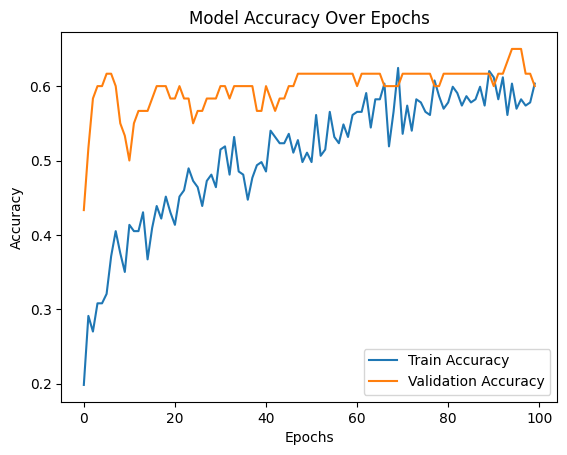

In [31]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()


### CALLBACKS = its help to give power to model so its used resources efficiently.



In [33]:
from tensorflow.keras import callbacks

In [37]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
'''
monitors = useually we give val_loss/val_accuracy

patience = if 10,  means its will check more 10 epoch even my accuracy not improve as thinking maybe increses (like extra chance to model if you have a ability so you may improve but i need significant improvement not less, if you are unable so i will stop training)

restore_best_weights = its store best validation loss value weight . if false then its store last epoch validation loss.

'''

model_checkpoint = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss') # save best model

# tensorflow model store = .h (.h5 is commonly used when saving Keras/TensorFlow models (HDF5 format).) [.pt	short for PyTorch	More common for scripts and export]
# pytorch model store = .pt or .pth (.pt or .pth are both used for PyTorch models (they’re basically the same, just personal preference).)  [.pth	short for "PyTorch weights"	Often used in community/model hubs]


In [38]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint]) # csv.login also can be used

Epoch 1/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 1.0372

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5426 - loss: 1.0648 - val_accuracy: 0.6333 - val_loss: 0.8880
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5457 - loss: 0.9776 - val_accuracy: 0.6333 - val_loss: 0.9251
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6034 - loss: 1.0144 - val_accuracy: 0.6333 - val_loss: 0.9010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6387 - loss: 0.9683 - val_accuracy: 0.6500 - val_loss: 0.9189
Epoch 5/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5625 - loss: 1.1737

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5921 - loss: 1.0460 - val_accuracy: 0.6667 - val_loss: 0.8858
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5634 - loss: 1.0105 - val_accuracy: 0.6333 - val_loss: 0.9343
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5798 - loss: 1.0572 - val_accuracy: 0.6500 - val_loss: 0.8983
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6157 - loss: 0.9907 - val_accuracy: 0.6500 - val_loss: 0.8914
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5963 - loss: 0.9820 - val_accuracy: 0.6333 - val_loss: 0.9273
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6772 - loss: 0.9218 - val_accuracy: 0.6333 - val_loss: 0.9455
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6353 - loss: 0.9167 - val_accuracy: 0.6833 - val_loss: 0.9021
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6446 - loss: 0.8887 - val_accuracy: 0.6667 - val_loss: 0.8886
E

### SAVING AND LOADING A MODEL FOR PREDICTIONS

In [39]:
model.save("model.h5")

In [40]:
loaded_model = keras.models.load_model("model.h5")

In [41]:
new_sample = [{"age": 50, "sex": 1, "cp": 2, "trestbps": 140, "chol": 250, "fbs": 0, "restecg": 1, "thalach": 160, "exang": 0, "oldpeak": 1.5, "slope": 2, "ca": 0, "thal": 3}]


In [42]:
# test on new data
def predict_new_data(new_data):
    new_data = pd.DataFrame(new_data, columns=X.columns)
    predictions = loaded_model.predict(new_data)
    predicted_classes = np.argmax(predictions, axis=1) # argmax give, from o/p layer their are 5 neurons but its give only one neuron value which have highest probability.
    return predicted_classes

In [43]:
predicted_label = predict_new_data(new_sample)
print(f"Predicted class: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
Predicted class: 0


### MAKE MODEL USING FUNCTIONAL API

In [44]:
from tensorflow.keras import Model, Input ,regularizers

In [46]:
# define/create  inputs
inputs = Input(shape=(X_train.shape[1],))

#create first hidden layer
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# create second hidden layer
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# create output layer
outputs = layers.Dense(y_test.shape[1], activation='softmax')(x)

In [47]:
# store all layer inside a model
model = Model(inputs=inputs, outputs=outputs)

In [48]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,141 (43.52 KB)

 Trainable params: 10,757 (42.02 KB)

 Non-trainable params: 384 (1.50 KB)